In [20]:
import pickle 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import axcgnss as axg


In [12]:
# Read results 
with open('../all_results.pkl', 'rb') as handle:
    all_results = pickle.load(handle)
all_results = pd.DataFrame(all_results)

In [14]:
def select_data(df, sampling_frequency, quantization, cn0):

    _df = df[df['sampling_frequency'].eq(sampling_frequency) & df['quantization'].eq(quantization) & df['cn0_target_dB'].eq(cn0)]
    _df = _df.dropna(axis=1, how='all')

    return _df 

(-20.0, 20.0)

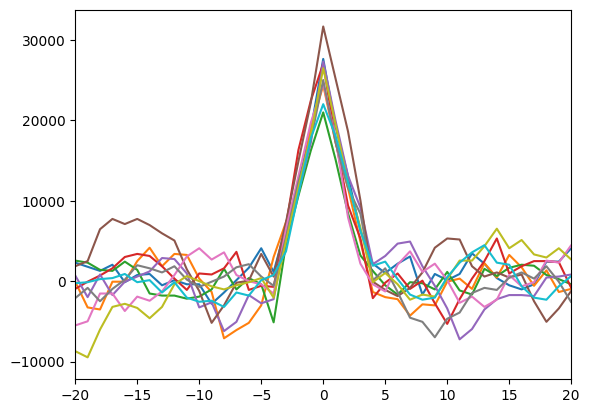

In [35]:
df = select_data(all_results, 4092000.0, 8, 45)
for index, row in df.iterrows():
    plt.plot(row['corr_lags'], row['axc_corr_mul8s_1L12'])
plt.xlim((-20,20))

In [57]:

for cn0 in range(30, 60, 5):
    df = select_data(all_results, 4092000.0, 8, cn0)
    snr = []
    for index, row in df.iterrows():
        corr = np.abs(row['axc_corr_mul8s_1L12'])
        snr.append(axg.getPostCorrelationSNR(corr/np.max(corr), 4092000.0))
    snr = np.array(snr)
    print(f"CN0: {cn0}, {snr.mean():.5f}")

CN0: 30, 5.14398
CN0: 35, 4.85732
CN0: 40, 6.28516
CN0: 45, 6.86964
CN0: 50, 6.86444
CN0: 55, 6.83674


/mnt/d/Projects/Navigation/MyCode/axcgnss/Simulations/axcgnss.py:292: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(value_linear)
/mnt/d/Projects/Navigation/MyCode/axcgnss/Simulations/axcgnss.py:292: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(value_linear)
/mnt/d/Projects/Navigation/MyCode/axcgnss/Simulations/axcgnss.py:292: RuntimeWarning: invalid value encountered in log10
  return 10 * np.log10(value_linear)


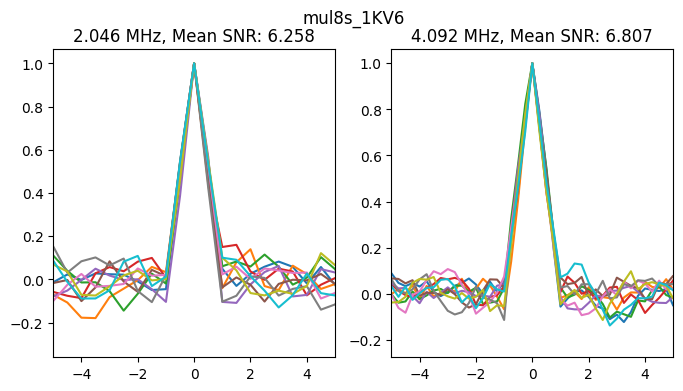

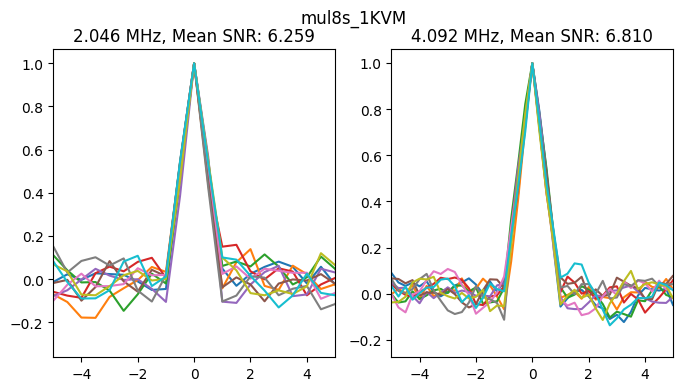

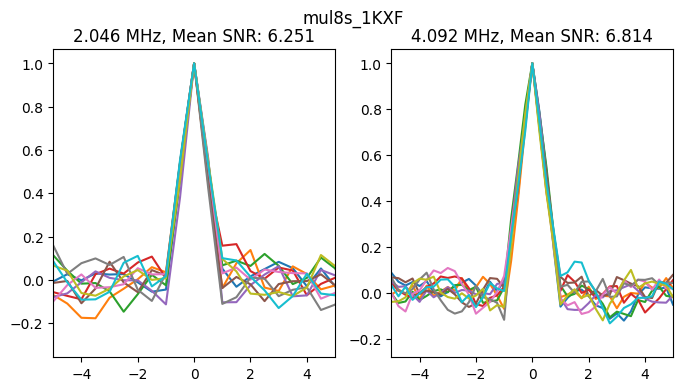

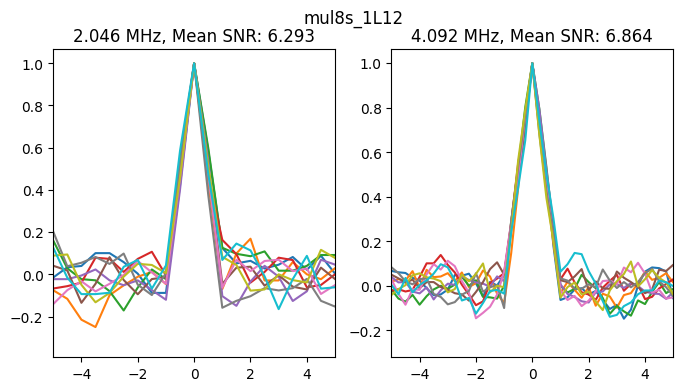

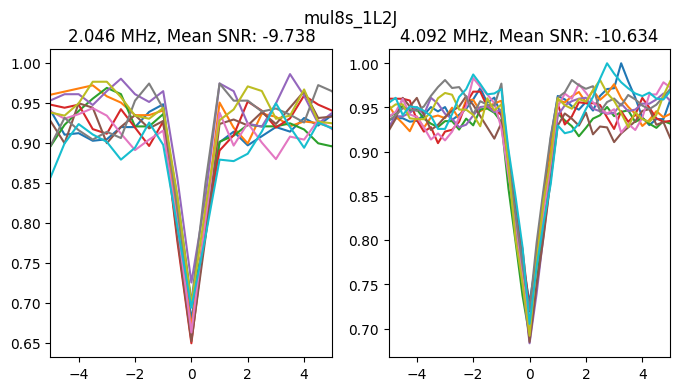

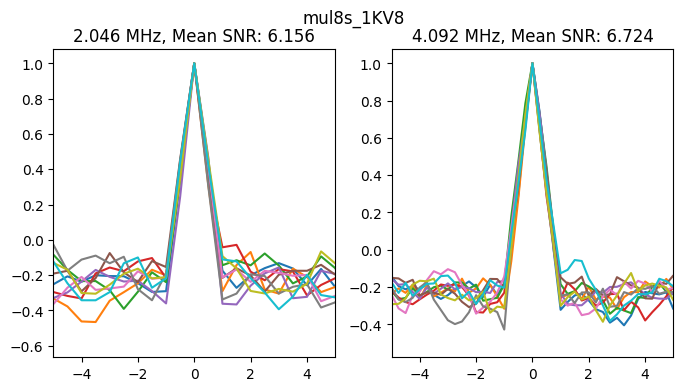

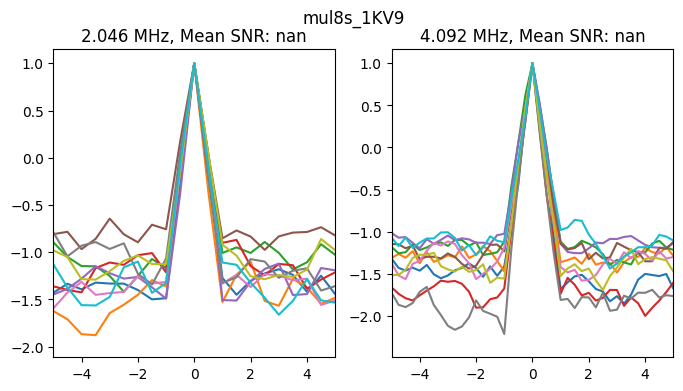

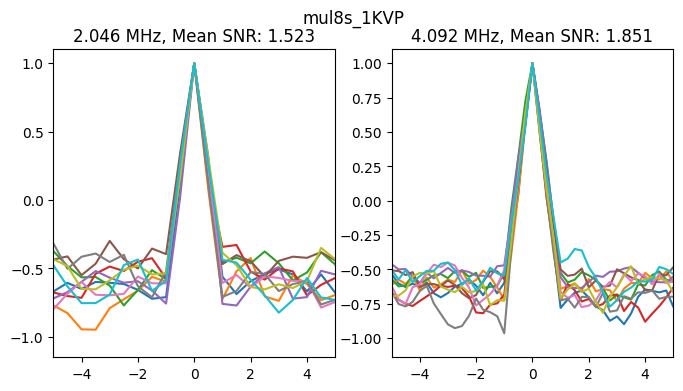

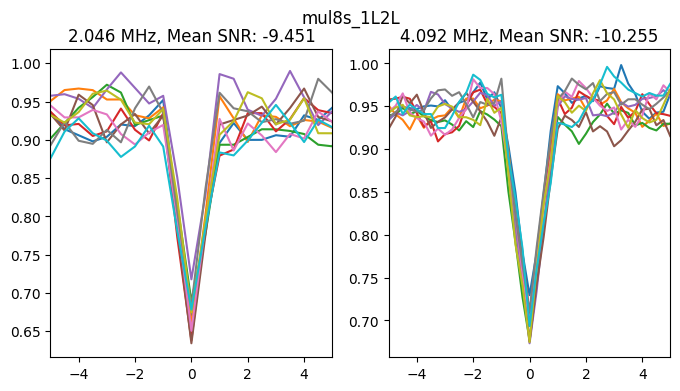

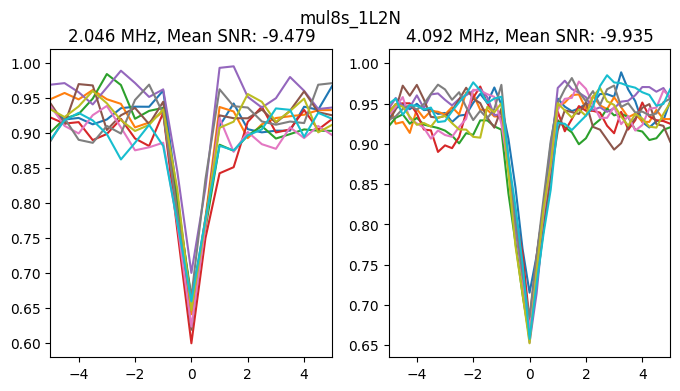

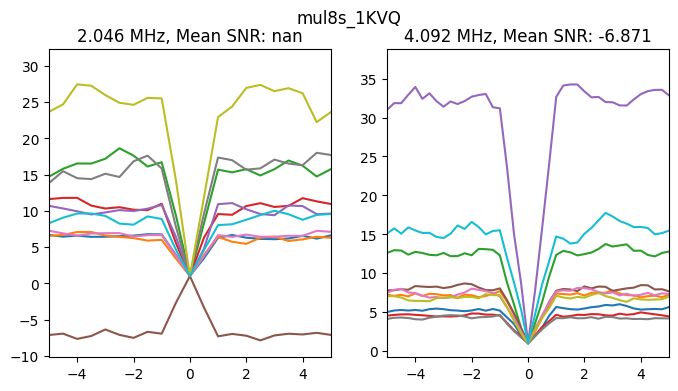

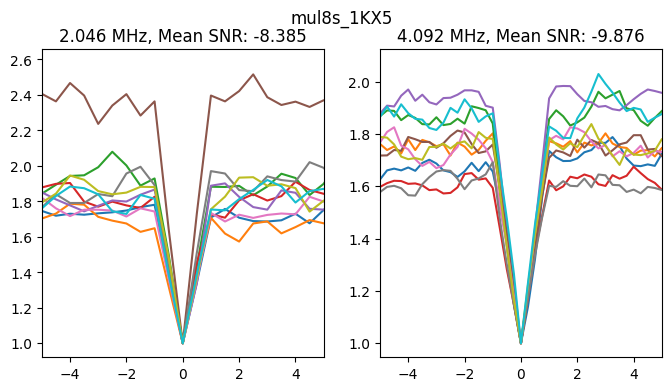

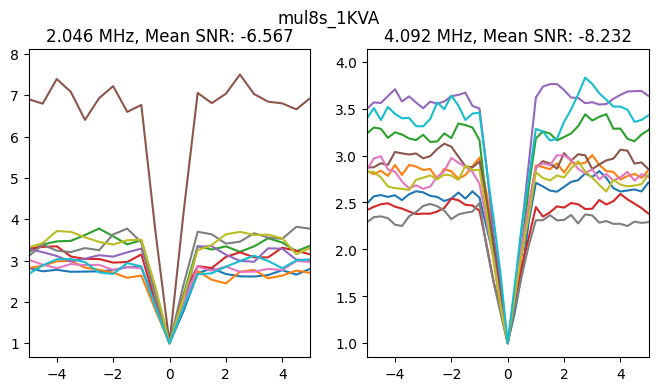

In [60]:
axc_mult_list = list(axg.EAL_MULTIPLIERS_8BIT_SIGNED.keys())
sf_list = np.array([2, 4]) * axg.GPS_L1CA_CODE_FREQ
cn0 = 50

for axc_mult in axc_mult_list:
    fig, axs = plt.subplots(1,2, figsize=(8, 4), facecolor='w', edgecolor='k')
    fig.suptitle(axc_mult)
    i = 0
    for sf in sf_list:
        samplesPerChip = round(sf / axg.GPS_L1CA_CODE_FREQ)
        df = select_data(all_results, sf, 8, cn0)
        snr = []
        for index, row in df.iterrows():
            # corr = np.abs(row[f'axc_corr_{axc_mult}'])
            corr = row[f'axc_corr_{axc_mult}']
            axs[i].plot(row['corr_lags']/samplesPerChip, corr/np.max(corr))
            snr.append(axg.getPostCorrelationSNR(corr/np.max(corr), sf))
        snr = np.array(snr)
        axs[i].set_xlim((-5,5))
        axs[i].set_title(f"{sf/1e6:.3f} MHz, Mean SNR: {snr.mean():.3f}")
        i += 1
    